### Analyzing the Stroop Effect

Search results of stroop effect: [stroop effect](https://www.google.com/search?q=stroop+effect&oq=stroop+effect&aqs=chrome..69i57j69i61l3.6567j0j7&sourceid=chrome&ie=UTF-8)


(1) What is the independent variable? What is the dependent variable?



### Answer to question 1:


- The independent variable is the: **(stimulus)** or in this case, the presentation of a word in letters describing a color in either a matching font color (i.e., a congruent presentation) or a non matching font color (i.e., an incongruent presentation) 


- The dependent variable on the other hand, is the: **(response)** or in this case the reaction time, also called the: *(interference score)* in this experiment, which is the time it takes a person to enunciate the actual font ink color of a displayed color name. For example, if the word 'PINK' is displayed in blue ink, the dependent variable or response, is how long in seconds it takes a person to enunciate the word blue from the time the word is shown to the subject even though the written word says "PINK".

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

### Answer to question 2:

- $H_0$ =  Null hypothesis
- $H_A$ =  Alternate hypothesis
- $\mu_c$ =  mean response time of the congruent presentation (font color matches the word color description)
- $\mu_i$ =  mean response time of the incongruent presentation (font color does not match the word color description)

---

The Null hypothesis: the congruent presentation mean repsonse time equals the incogruent presentation mean response time

$H_0$ :     $\mu_c$   =     $\mu_i$ 

---

The Alternative hypothesis: the congruent presentation mean response time does not equal the incongruent presentation mean response time

$H_A$:      $\mu_c$   ≠      $\mu_i$   


---


- When each participant is tested under both conditions (congruency) and (incongruency) a ttest_rel [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html) is selected to ascertain if the differences in the means of the two groups of responses are statistically significant. 

- When the alternative hypothesis states that; the test results are either less than or greater than the null hypothesis we are expecting the distribution for a two tailed test, in this particular experiment however, we'll use the results as if it were a one tailed or one sided experiment because of the fact that negative response times are infeasible. 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

### Answer to question 3:

In [52]:
# Perform the analysis here
# importing packages
import os
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plot
import statistics as st
from scipy import stats
from scipy.stats import t
# setting a random seed
np.random.seed(2019)


# read in data
df = pd.read_csv('stroopdata.csv')
#

For the measure of central tendency we'll caculate the mean and for the measure of variation we'll caculate the standard deviation for both the congruent and incongruent experiment test results.

In [53]:
# Calculate and print the mean and std for both test results
print('Congruent values mean =', round(df['Congruent'].mean(),4),
      'Congruent values Std = ', round(df['Congruent'].std(),4))
print('Incongruent values mean =', round(df['Incongruent'].mean(),4),
      'Incongruent values Std = ', round(df['Incongruent'].std(),4))
#

Congruent values mean = 14.0511 Congruent values Std =  3.5594
Incongruent values mean = 22.0159 Incongruent values Std =  4.7971


(4) Provide one or two visualizations that show the distribution of the sample data.

- Write one or two sentences noting what you observe about the plot or plots.

### Answer to question 4 part 1:

Plot of the Data Frame = df, 'Congruent' column data below, has a mean of aproximatley 14 and has a Gaussian or normal shape distribution

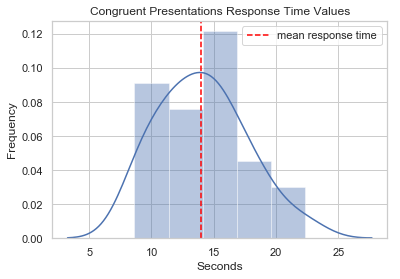

In [54]:
## apply plot background style
sns.set(style="whitegrid");

# plot distribution of Congruent Presentations values 
sns.distplot(df['Congruent'])
plot.axvline(x = round(df['Congruent'].mean(),0),linestyle='dashed',color = 'red',label='mean response time')
plot.title('Congruent Presentations Response Time Values')
plot.xlabel('Seconds')
plot.ylabel('Frequency')
plot.legend()
plot.show()
#

### Answer to question 4  part 2:

- The plot of the Data Frame (df)'Incongruent'column data below is bimodal in shape where both modes are relatively Gaussian or normal shaped.


- The overall mean repsonse time of this bimodal data is approximately 22 which was calculated above and plotted on the graph below in a dashed red verticle line. 

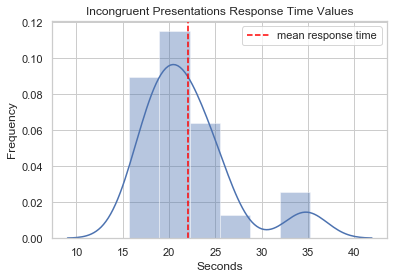

In [55]:
# apply plot background style
sns.set(style="whitegrid");

# plot the distribution of the Incongruent Presentations variable
sns.distplot(df['Incongruent'])
plot.axvline(x = round(df['Incongruent'].mean(),0),linestyle='dashed',color = 'red',label='mean response time')
plot.title('Incongruent Presentations Response Time Values')
plot.xlabel('Seconds')
plot.ylabel('Frequency')
plot.legend()
plot.show()
#

(5)  Now, perform the statistical test and report your results.

- What is your confidence level or Type I error associated with your test?

- What is your conclusion regarding the hypotheses you set up?

- Did the results match up with your expectations?  

### Answer to question 5 parts 1 & 2 :

Calculate the degrees of freedom below which is one less than the length of the data frame.

In [56]:
# Print the degrees of freedom
print('Degrees of freedom =', len(df)-1)
#

Degrees of freedom = 23


Calculate the raw difference in mean response times between the two presentations below

In [57]:
# Print the difference in means between the congruent and
# incongruent presentations rounded to four places
print('Difference in Means =', abs(round(df['Congruent'].mean() - df['Incongruent'].mean(),4)))
#

Difference in Means = 7.9648


Calculate the difference in mean standard deviations between the two presentations below

In [58]:
# Print the difference in standard deviations between the
# congruent and incongruent presentations rounded to four places
print('Difference in standard deviations =', abs(round(df['Incongruent'].std() - df['Congruent'].std(),4)))
#

Difference in standard deviations = 1.2377


For the chosen combination of the null and alternate hypothesis above we would like to have a 99% confidence level in the results of our calculations being meaningful or significant therefore we chosen an Alpha or Type i error rate of 0.01.

In [75]:
# Print the desired Alpha or Type I error rate below
#
Alpha = np.float(0.01)
#
print('Alpha = ', Alpha)
#

Alpha =  0.01


Set the random seed to enable reproducibility of the calculations by others

In [ ]:
# set random seed     
np.random.seed(2019)

Select the appropriate statistical test for determining t-statistic for a paired data set. The chosen test is the ttest_rel because this is data is from pairs of tests conducted on the same groups of individuals.

In [60]:
# apply the stats.ttest_rel function for "Calculates the T-test on TWO RELATED samples of scores, a and b and
# print the results below
#
print(stats.ttest_rel(df['Congruent'],df['Incongruent'],axis=0))
#

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)


Make a boolean comparison between the t-statistic and the p-value to determine if the results of the difference between the means of the paired tests of the congruent presentations vs the incongruent presentations for each subject is significant at the .99 conficence level.

In [61]:
# assign the ttest_rel results to the variable results_ttest 
results_ttest = stats.ttest_rel(df['Congruent'],df['Incongruent'],axis=0)

# is the t-statistic greater than or equal to the pvalue
print('The t-statistic is greater than or equal to the p-value?', results_ttest[0] >= results_ttest[1])
#

The t-statistic is greater than or equal to the p-value? False


### Answer to question 5 part 3:

#### Explanation of ttest_rel:

-  The t-statistic is less than the p-value (threshold) therefore we reject the Null Hyposthesis because:
    the difference in means between the congruent and incongruent response times are not likely to be
    due to chance, therefore the difference between the two means is significant.


### (6) Optional:

- What do you think is responsible for the effects observed?

- Can you think of an alternative or similar task that would result in a similar effect?

- Some research about the problem will be helpful for thinking about these two questions!

### Answer to question 6:

- In this situation I believe the brain has two automation processes going on simultaneously which are in competion with each other and depending on the instructions given verbally to the test takers the brain must override one of two automatic responses to stimuli it has been presented with, which causes an average delay in decision making by a magnitude of approximatley 8 seconds which is significant and not due to chance.

- A similar task in my view would be driving a vehicle while texting. 

- People who are texting while driving are often unable to safely keep control of their vehicles and wind up in auto accidents because of delays in reaction time caused by competing stimuli to the brain.

### References:

- https://seaborn.pydata.org/tutorial.html

- https://en.wikipedia.org/wiki/Standard_error

- https://en.wikipedia.org/wiki/Critical_value

- https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html

- https://stackoverflow.com/questions/17941083/how-to-label-a-line-in-matplotlib-python/17942066

- https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True

- http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/en_Tanagra_Calcul_P_Value.pdf

- https://www.itl.nist.gov/div898/handbook/eda/section3/eda3672.htm

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

- https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html

- https://github.com/deepak525/Test-a-Perceptual-Phenomenon/blob/master/Test_a_Perceptual_Phenomenon.ipynb

- https://github.com/latinacode/Test-a-Perceptual-Phenomenon/blob/master/Test%20a%20Perceptual%20Phenomenon.ipynb

- https://github.com/j450h1/P1-Test-a-Perceptual-Phenomenon/blob/master/Project%20Questions.ipynb

- https://github.com/abodacs/Test-a-Perceptual-Phenomenon/blob/master/Test%20a%20Perceptual%20Phenomenon.ipynb

- https://ryanwingate.com/assets/projects/Stroop_Effect_Analysis.html

- https://github.com/SThornewillvE/Udacity-Project---Test-a-perceptual-phenomenon/blob/master/Test-a-Perceptual-Phenomenon.ipynb

- https://github.com/kanhua/Udacity-DA-projects/blob/master/Test%20a%20Perceptual%20Phenomenon/Test%20a%20perceptual%20phenomenon.ipynb